# Code for all plots on paper

## Figure 2

#### Figure 2a - Forward Modeling

Total common barcodes: 11458
Total filtered gene counts (post-remove): 39412817


/tmp/ipykernel_1035027/2502620663.py:104: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, ymax)
/tmp/ipykernel_1035027/2502620663.py:105: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, ymax)


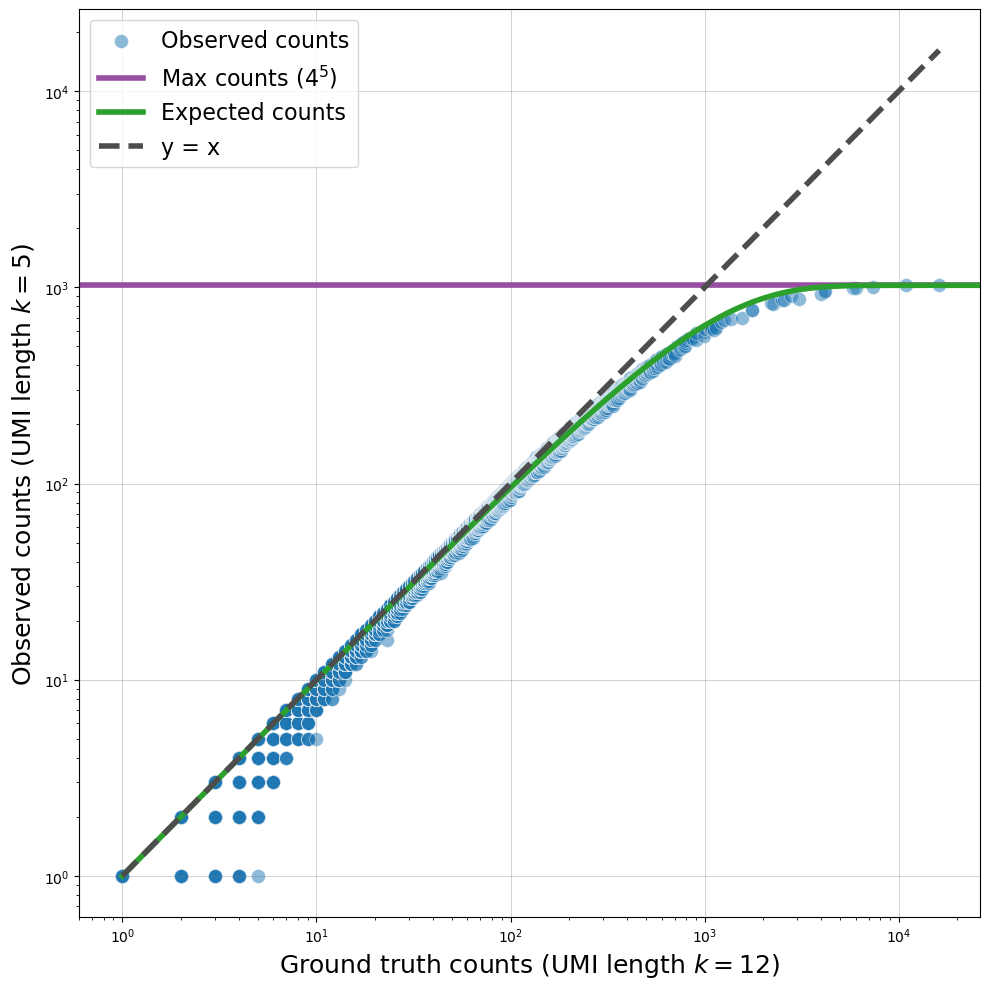

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

# Define which genes to remove
remove = np.array([
    "MALAT1",
    # add any other gene names you want to drop here
])

dataset = "10k_PBMCs"  # Change to "1k_PBMCs" if needed

adata_dict = {}
adata_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"  # 10k dataset 

for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(f"{adata_path}/adata_{i}.h5ad")

# Your model function
def f(n_vals, j):
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# Fixed UMI length for "true" counts
i = 12
j = 5  # Only generate for UMI 5
n_values = np.logspace(0, 4.5, 200)

# Ensure both datasets are properly aligned
common_barcodes = sorted(
    set(adata_dict[i].obs_names).intersection(set(adata_dict[j].obs_names))
)
print(f"Total common barcodes: {len(common_barcodes)}")

barcode_list = list(common_barcodes)
indices_i = [adata_dict[i].obs_names.tolist().index(barcode) for barcode in barcode_list]
indices_j = [adata_dict[j].obs_names.tolist().index(barcode) for barcode in barcode_list]

# Create a mask for genes to **keep** (i.e. not in 'remove')
gene_mask = ~np.isin(adata_dict[i].var_names, remove)

# Pull full matrices at once, subsetting both cells and genes
X_i = adata_dict[i].X[indices_i][:, gene_mask]
X_j = adata_dict[j].X[indices_j][:, gene_mask]

# Create a mask for the filtered counts (based on X_i >= 1)
mask = X_i >= 1

# Filter using the mask 
filtered_counts_i = X_i[mask]
filtered_counts_j = X_j[mask]

# Convert to numpy arrays if they are sparse matrices
all_gene_counts_i = np.array(filtered_counts_i)
all_gene_counts_j = np.array(filtered_counts_j)

print(f"Total filtered gene counts (post-remove): {len(all_gene_counts_i)}")

# Sort by the ground-truth counts
sorted_indices = np.argsort(all_gene_counts_i)
sorted_gene_counts_i = all_gene_counts_i[sorted_indices]
sorted_gene_counts_j = all_gene_counts_j[sorted_indices]

# Create plot (unchanged styling)
plt.figure(figsize=(10, 10))
plt.scatter(
    sorted_gene_counts_i, 
    sorted_gene_counts_j, 
    alpha=0.5, 
    c='#1f77b4',  # Standard Blue for Points
    edgecolors='w', 
    s=100,             # Increased marker size (was 50)
    linewidth=0.5, 
    label='Observed counts'
)

# Add the asymptotic line for UMI 5
y_asymptotic_value = 4**j
plt.axhline(
    y=y_asymptotic_value, 
    color='#984ea3', 
    linestyle='-', 
    linewidth=4, 
    label=f'Max counts ($4^{{{j}}}$)'
)

# Plot the model
model_vals = f(n_values, j)
plt.plot(
    n_values, 
    model_vals, 
    color='#2ca02c',  # Standard Green for Model Line
    linewidth=4, 
    label='Expected counts'
)

# Reference y = x line
max_val = max(sorted_gene_counts_i.max(), sorted_gene_counts_j.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=4, label='y = x')

# Axis scaling and labels
plt.xscale('log')
plt.yscale('log')
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.xlim(0, ymax)
plt.ylabel(r"Observed counts (UMI length $k=5$)", fontsize=18)
plt.xlabel(r"Ground truth counts (UMI length $k=12$)", fontsize=18)
# plt.title("Observed vs. Ground truth counts (Remove MALAT1)", fontsize=20)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc="upper left", fontsize=16)  # Or any other position

plt.tight_layout()
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures/1k_PBMCs/observed_vs_ground_truth_counts_remove_MALAT1.jpeg", dpi=300) # for 1k_PBMCs
plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures/10k_PBMCs/observed_vs_ground_truth_counts_remove_MALAT1.jpeg", dpi=300) # for 10k_PBMCs
plt.show()
plt.close()

#### Figure 2b - Inverse 

Total common barcodes: 1232
Total filtered gene counts: 4282363


/tmp/ipykernel_1035027/2147019612.py:107: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, ymax)
/tmp/ipykernel_1035027/2147019612.py:108: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, ymax)


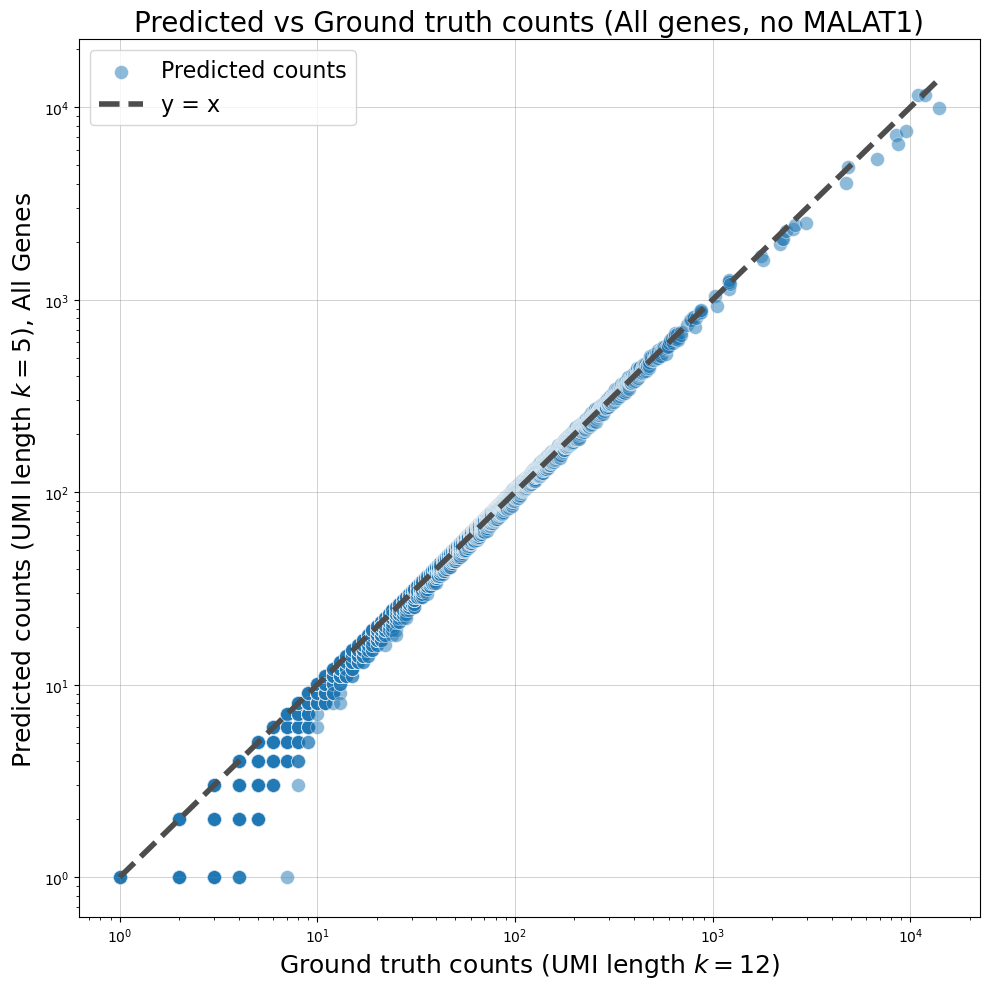

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

dataset = "1k_PBMCs" 
# dataset = "10k_PBMCs" 

adata_12 = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/adata_12.h5ad")

adata_dict = {}
for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/inv_nonunif_matrices/adata_{i}.h5ad")
    

# Define which genes to remove
remove = np.array([
    "MALAT1",
    # add any other gene names you want to drop here
])
 
# Your model function
def f(n_vals, j):
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# Fixed UMI length for "true" counts
i = 12
j = 5  # Only generate for UMI 5
n_values = np.logspace(0, 4.5, 200)

# Ensure both datasets are properly aligned
common_barcodes = sorted(set(adata_12.obs_names).intersection(set(adata_dict[j].obs_names)))
print(f"Total common barcodes: {len(common_barcodes)}")

barcode_list = list(common_barcodes)
indices_i = [adata_12.obs_names.tolist().index(barcode) for barcode in barcode_list]
indices_j = [adata_dict[j].obs_names.tolist().index(barcode) for barcode in barcode_list]

# Create a mask for genes to **keep** (i.e. not in 'remove')
gene_mask = ~np.isin(adata_12.var_names, remove)

# Pull full matrices at once, subsetting both cells and genes
X_i = adata_12.X[indices_i][:, gene_mask]
X_j = adata_dict[j].X[indices_j][:, gene_mask]

mask = X_i >= 1


# Filter using the mask 
filtered_counts_i = X_i[mask]
filtered_counts_j = X_j[mask]


# Convert to numpy arrays if they are sparse matrices
all_gene_counts_i = np.array(filtered_counts_i)
all_gene_counts_j = np.array(filtered_counts_j)

print(f"Total filtered gene counts: {len(all_gene_counts_i)}")

sorted_indices = np.argsort(all_gene_counts_i)
sorted_gene_counts_i = all_gene_counts_i[sorted_indices]
sorted_gene_counts_j = all_gene_counts_j[sorted_indices]



# Create plot
plt.figure(figsize=(10, 10))
plt.scatter(
    sorted_gene_counts_i, 
    sorted_gene_counts_j, 
    alpha=0.5, 
    c='#1f77b4',  # Standard Blue for Points
    edgecolors='w', 
    s=100,             # Increased marker size (was 50)
    linewidth=0.5, 
    label='Predicted counts'
)

# Add the asymptotic line for UMI 5
# y_asymptotic_value = 4**j
# plt.axhline(
#     y=y_asymptotic_value, 
#     color='#984ea3', 
#     linestyle='-', 
#     linewidth=4, 
#     label=f'Max counts ($4^{{{j}}}$)'
# )

# # Plot the model
# model_vals = f(n_values, j)
# plt.plot(
#     n_values, 
#     model_vals, 
#     color='#2ca02c',  # Standard Green for Model Line
#     linewidth=4, 
#     label='Expected counts'
# )

# Reference y = x line
max_val = max(sorted_gene_counts_i.max(), sorted_gene_counts_j.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=4, label='y = x')

# Axis scaling and labels
plt.xscale('log')
plt.yscale('log')
ymin, ymax = plt.ylim()
plt.ylim(0, ymax)
plt.xlim(0, ymax)
plt.ylabel(r"Predicted counts (UMI length $k=5$), All Genes ", fontsize=18)
plt.xlabel(r"Ground truth counts (UMI length $k=12$)", fontsize=18)
plt.title("Predicted vs Ground truth counts (All genes, no MALAT1)", fontsize=20)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(loc="upper left", fontsize=16)  # Or any other position

plt.tight_layout()

plt.show()
plt.close()

#### Figure 2c - TVD 

In [ ]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

def tvd(p, q):
    """
    Calculate the Total Variation Distance (TVD) between two probability distributions p and q.
    Assumes that p and q are numpy arrays with the same length.
    """
    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)
    
    if np.isnan(p).any() or np.isinf(p).any():
        raise ValueError("Input array p contains NaN or infinite values.")
    if np.isnan(q).any() or np.isinf(q).any():
        raise ValueError("Input array q contains NaN or infinite values.")
    
    sum_p = np.sum(p)
    sum_q = np.sum(q)
    if sum_p == 0 or sum_q == 0:
        raise ValueError("Sum of the input arrays should not be zero.")
    
    p = p / sum_p
    q = q / sum_q
    return 0.5 * np.sum(np.abs(p - q))

dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed

remove = np.array(['MALAT1'])  # <-- replace with your list

# Loading the regular adata matrices
common_path = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices"
regular_adata_dict = {}
for i in range(1, 13):
    path = f"{common_path}/adata_{i}.h5ad"
    adata = sc.read_h5ad(path)
    adata = adata[:, ~np.in1d(adata.var_names, remove)].copy()
    regular_adata_dict[i] = adata

# Loading the inverted non-unif matrices
common_path2 = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/inv_nonunif_matrices"
non_unif_adata_dict = {}
for i in range(1, 12):
    path = f"{common_path2}/adata_{i}.h5ad"
    adata = sc.read_h5ad(path)
    adata = adata[:, ~np.in1d(adata.var_names, remove)].copy()
    non_unif_adata_dict[i] = adata
adata = sc.read_h5ad(f"{common_path}/adata_12.h5ad")
adata = adata[:, ~np.in1d(adata.var_names, remove)].copy()
non_unif_adata_dict[12] = adata

# This is the ground truth adata matrix
gt_adata12 = regular_adata_dict[12]

# Initialize lists to store the mean and quantile-based confidence intervals
mean_errors = []
ci_low_errors = []
ci_high_errors = []

mean_errors2 = []
ci_low_errors2 = []
ci_high_errors2 = []

# Compute TVD for regular and inverted matrices against the ground truth
for i in range(1, 13):
    # Errors for regular matrices
    errors = []
    for barcode in gt_adata12.obs_names:
        index1 = np.where(regular_adata_dict[i].obs_names == barcode)[0][0]
        index_gt = np.where(gt_adata12.obs_names == barcode)[0][0]
        
        gene_counts1 = regular_adata_dict[i].X[index1]
        gene_counts_gt = gt_adata12.X[index_gt]
        
        if not isinstance(gene_counts1, np.ndarray):
            gene_counts1 = gene_counts1.toarray().flatten()
        else:
            gene_counts1 = gene_counts1.flatten()
        
        if not isinstance(gene_counts_gt, np.ndarray):
            gene_counts_gt = gene_counts_gt.toarray().flatten()
        else:
            gene_counts_gt = gene_counts_gt.flatten()
        
        mask = gene_counts_gt >= 1
        gene_counts1 = gene_counts1[mask]
        gene_counts_gt = gene_counts_gt[mask]
        
        sorted_indices = np.argsort(gene_counts1)
        sorted_gene_counts1 = gene_counts1[sorted_indices]
        sorted_gene_counts_gt = gene_counts_gt[sorted_indices]
        
        error = tvd(sorted_gene_counts1, sorted_gene_counts_gt)
        errors.append(error)
    
    mean_errors.append(np.mean(errors))
    q_low, q_high = np.percentile(errors, [2.5, 97.5])
    ci_low_errors.append(np.mean(errors) - q_low)
    ci_high_errors.append(q_high - np.mean(errors))
    
    # Errors for non-uniform matrices
    errors2 = []
    for barcode in gt_adata12.obs_names:
        index2 = np.where(non_unif_adata_dict[i].obs_names == barcode)[0][0]
        index_gt = np.where(gt_adata12.obs_names == barcode)[0][0]
        
        gene_counts2 = non_unif_adata_dict[i].X[index2]
        gene_counts_gt = gt_adata12.X[index_gt]
        
        if not isinstance(gene_counts2, np.ndarray):
            gene_counts2 = gene_counts2.toarray().flatten()
        else:
            gene_counts2 = gene_counts2.flatten()
        
        if not isinstance(gene_counts_gt, np.ndarray):
            gene_counts_gt = gene_counts_gt.toarray().flatten()
        else:
            gene_counts_gt = gene_counts_gt.flatten()
        
        mask = gene_counts_gt >= 1
        gene_counts2 = gene_counts2[mask]
        gene_counts_gt = gene_counts_gt[mask]
        
        sorted_indices = np.argsort(gene_counts2)
        sorted_gene_counts2 = gene_counts2[sorted_indices]
        sorted_gene_counts_gt = gene_counts_gt[sorted_indices]
        
        error2 = tvd(sorted_gene_counts2, sorted_gene_counts_gt)
        errors2.append(error2)  
    
    mean_errors2.append(np.mean(errors2))
    q_low2, q_high2 = np.percentile(errors2, [2.5, 97.5])
    ci_low_errors2.append(np.mean(errors2) - q_low2)
    ci_high_errors2.append(q_high2 - np.mean(errors2))

print(mean_errors)
print(mean_errors2)

# Plotting the errors with quantile-based CI
num_experiments = len(mean_errors)

plt.figure(figsize=(10, 10))

# Plot errors for the Regular Matrices (Naive Estimator)
plt.errorbar(
    range(1, num_experiments), 
    mean_errors[:-1], 
    yerr=[ci_low_errors[:-1], ci_high_errors[:-1]], 
    fmt='o-', 
    color='#1f77b4',
    ecolor='#1f77b4',
    linewidth=3,
    elinewidth=3, 
    capsize=4, 
    markersize=10,
    label='Naive estimator'
)

# Plot errors for the Inverted Non-Uniform Matrices (Collision-aware Estimator)
plt.errorbar(
    range(1, num_experiments), 
    mean_errors2[:-1], 
    yerr=[ci_low_errors2[:-1], ci_high_errors2[:-1]], 
    fmt='o-', 
    color='#2ca02c',
    ecolor='#2ca02c',
    linewidth=3,
    elinewidth=3, 
    capsize=4, 
    markersize=10,
    label='Non-uniform estimator'
)

plt.xlabel('UMI length', fontsize=18)
plt.ylabel('Error (Total variation distance)', fontsize=20)
plt.ylim(bottom=0)
# plt.yscale('log')
plt.legend(fontsize=16)  
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tight_layout()

plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures/{dataset}/1k_tvd_plot.pdf")
plt.show()


### Figures 2d-e

UMI-5: SSE naive=0.082176, SSE pred=0.003628
UMI-5: MSE naive=0.000740, MSE pred=0.000033


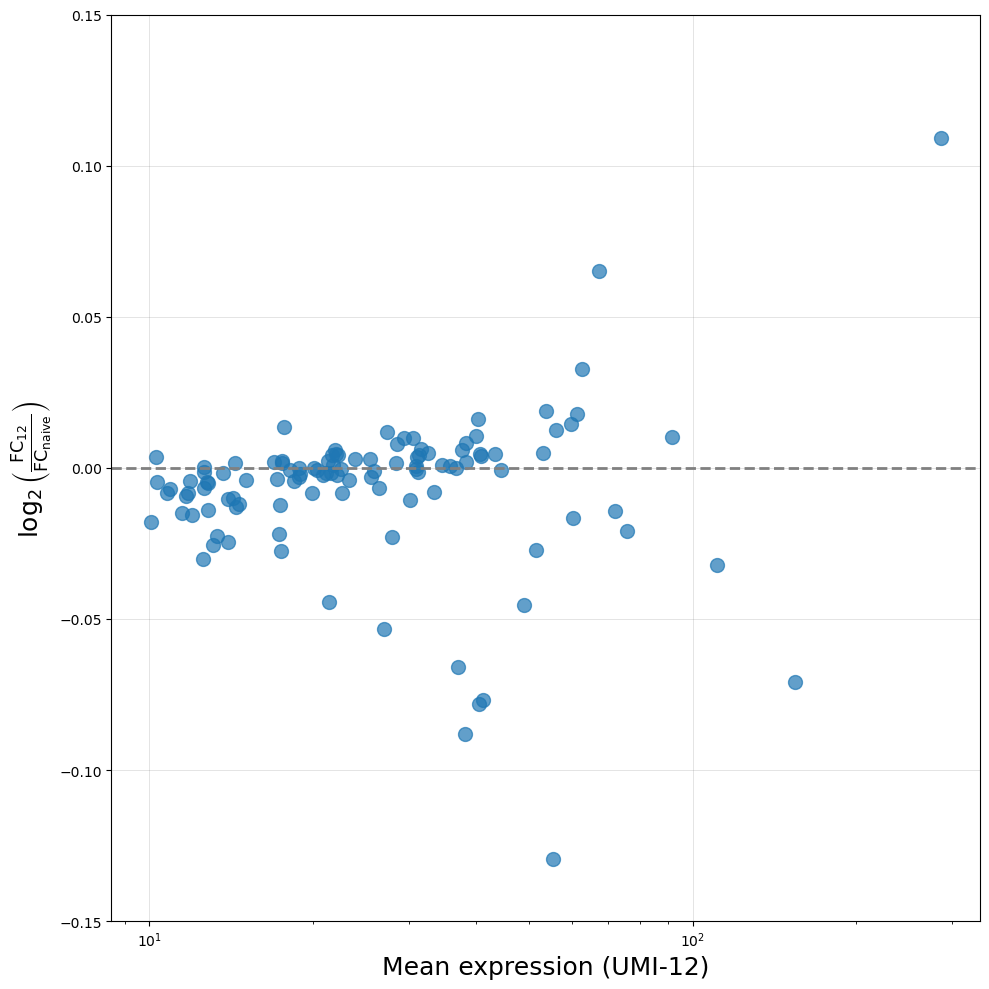

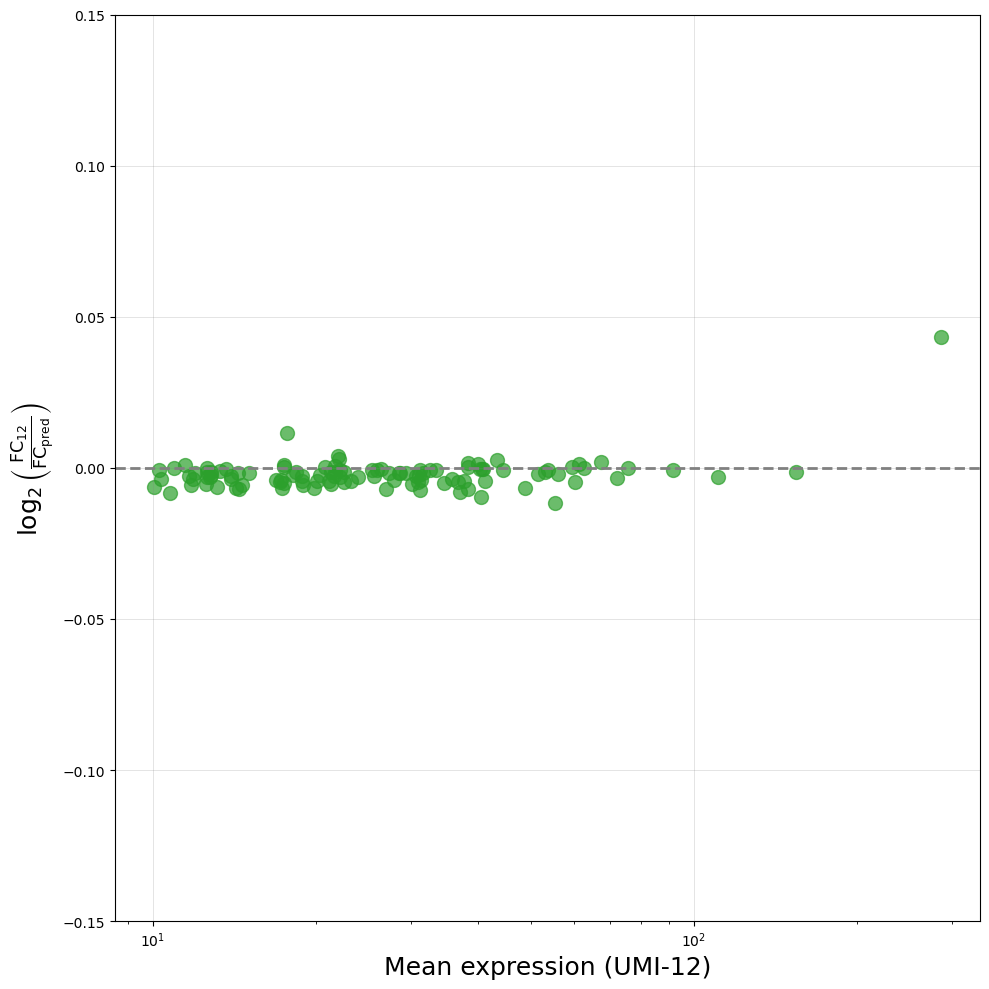

In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as sp
import matplotlib.pyplot as plt
from pathlib import Path


j = 5                      
GENE_LABEL = 'CD14_mono'
METHOD = 'wilcoxon'
FC_HI = np.log2(1.25)        # ≈ 0.32
FC_LO = -np.log2(1.25)       # ≈ -0.32
PVAL_THRESH = 0.05
AVG_COUNT_MIN = 10
dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed

GT_PATH = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/adata_12.h5ad"
LAB_PATH = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
NAIVE_FMT = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/adata_{j}.h5ad"
PRED_FMT  = f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/inv_nonunif_matrices/adata_{j}.h5ad"


adata_gt = sc.read_h5ad(GT_PATH)
labels = sc.read_h5ad(LAB_PATH)
reference_labels = labels.obs['majority_voting'].copy()
binary_labels = reference_labels.apply(lambda x: GENE_LABEL if x == GENE_LABEL else 'Other cells')

# normalized GT copy for DE
adata_12_norm = adata_gt.copy()
sc.pp.normalize_total(adata_12_norm, target_sum=1e4)
sc.pp.log1p(adata_12_norm)
adata_12_norm.obs['label'] = binary_labels.loc[adata_12_norm.obs_names]

# GT DE (UMI=12)
sc.tl.rank_genes_groups(
    adata_12_norm,
    groupby='label',
    method=METHOD,
    key_added=METHOD,
    use_raw=False
)
de_12 = sc.get.rank_genes_groups_df(adata_12_norm, group=GENE_LABEL, key=METHOD)

# avg counts from raw GT
X12 = adata_gt.X
avg12 = (np.asarray(X12.mean(axis=0)).ravel() if sp.issparse(X12) else X12.mean(axis=0))
df_avg12 = pd.DataFrame({"gene": adata_gt.var_names, "avg_count": avg12})

# attach avg to GT DE and filter genes (based only on GT)
de_12_avg = de_12.merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")
pcol = 'pvals_adj' if 'pvals_adj' in de_12_avg.columns else 'pvals'
keep_genes = de_12_avg.loc[
    ((de_12_avg['logfoldchanges'] >= FC_HI) | (de_12_avg['logfoldchanges'] <= FC_LO))
    & (de_12_avg[pcol] < PVAL_THRESH)
    & (de_12_avg['avg_count'] >= AVG_COUNT_MIN),
    'names'
].astype(str).values


naive_path = NAIVE_FMT.format(j=j)
pred_path  = PRED_FMT.format(j=j)
assert Path(naive_path).exists(), f"Missing file: {naive_path}"
assert Path(pred_path).exists(),  f"Missing file: {pred_path}"

adata_naive = sc.read_h5ad(naive_path)
adata_pred  = sc.read_h5ad(pred_path)

# alignment checks
assert adata_gt.obs_names.equals(adata_naive.obs_names), f"Cell barcodes differ at UMI-{j} (naive)."
assert adata_gt.var_names.equals(adata_naive.var_names), f"Genes differ at UMI-{j} (naive)."
assert adata_gt.obs_names.equals(adata_pred.obs_names),  f"Cell barcodes differ at UMI-{j} (pred)."
assert adata_gt.var_names.equals(adata_pred.var_names),  f"Genes differ at UMI-{j} (pred)."

# normalize/log1p & labels
for ad in (adata_naive, adata_pred):
    sc.pp.normalize_total(ad, target_sum=1e4)
    sc.pp.log1p(ad)
    ad.obs['label'] = binary_labels.loc[ad.obs_names]

# DE at j
sc.tl.rank_genes_groups(adata_naive, groupby='label', method=METHOD, key_added=METHOD, use_raw=False)
sc.tl.rank_genes_groups(adata_pred,  groupby='label', method=METHOD, key_added=METHOD, use_raw=False)

de_naive = sc.get.rank_genes_groups_df(adata_naive, group=GENE_LABEL, key=METHOD)
de_pred  = sc.get.rank_genes_groups_df(adata_pred,  group=GENE_LABEL, key=METHOD)

# attach avg and restrict to keep_genes
de_naive_avg = de_naive.merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")
de_pred_avg  = de_pred .merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")

de_12_k    = de_12_avg   [de_12_avg['names'].isin(keep_genes)]
de_naive_k = de_naive_avg[de_naive_avg['names'].isin(keep_genes)]
de_pred_k  = de_pred_avg [de_pred_avg['names'].isin(keep_genes)]

# merge three on names and sort by abundance
df = (
    de_12_k[['names','logfoldchanges','avg_count']].rename(columns={'logfoldchanges':'lfc_12'})
      .merge(de_naive_k[['names','logfoldchanges']].rename(columns={'logfoldchanges':'lfc_naive'}), on='names')
      .merge(de_pred_k [['names','logfoldchanges']].rename(columns={'logfoldchanges':'lfc_pred'}),  on='names')
      .sort_values('avg_count')
      .reset_index(drop=True)
)

# per-gene squared errors, SSE, MSE
se_naive = (df['lfc_naive'].to_numpy() - df['lfc_12'].to_numpy())**2
se_pred  = (df['lfc_pred' ].to_numpy() - df['lfc_12'].to_numpy())**2

sse_naive = float(se_naive.sum()) if se_naive.size else np.nan
sse_pred  = float(se_pred.sum())  if se_pred.size  else np.nan
mse_naive = float(se_naive.mean()) if se_naive.size else np.nan
mse_pred  = float(se_pred.mean())  if se_pred.size  else np.nan

print(f"UMI-{j}: SSE naive={sse_naive:.6f}, SSE pred={sse_pred:.6f}")
print(f"UMI-{j}: MSE naive={mse_naive:.6f}, MSE pred={mse_pred:.6f}")


# Plots for this j
df["logrf_naive"] = df['lfc_naive'] - df['lfc_12']
df["logrf_pred"]  = df['lfc_pred']  - df['lfc_12']

# Plot: Ground truth vs Naive
plt.figure(figsize=(10, 10))
plt.scatter(df['avg_count'], df['logrf_naive'], alpha=0.7, color='#1f77b4', s=100)
plt.axhline(0, color='grey', linestyle='--', linewidth=2)
plt.xscale('log')
plt.xlabel('Mean expression (UMI-12)', fontsize=18)
plt.ylabel(r"$\log_2\left(\frac{\mathrm{FC}_{12}}{\mathrm{FC}_{\mathrm{naive}}}\right)$", fontsize=18)
plt.ylim(-0.15, 0.15)
plt.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.3)
plt.tight_layout()
plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures/{dataset}/logfc_naive_UMI_{j}.pdf")
plt.show()

# Plot: Ground truth vs Predicted
plt.figure(figsize=(10, 10))
plt.scatter(df['avg_count'], df['logrf_pred'], alpha=0.7, color='#2ca02c', s=100)
plt.axhline(0, color='grey', linestyle='--', linewidth=2)
plt.xscale('log')
plt.xlabel('Mean expression (UMI-12)', fontsize=18)
plt.ylabel(r"$\log_2\left(\frac{\mathrm{FC}_{12}}{\mathrm{FC}_{\mathrm{pred}}}\right)$", fontsize=18)
plt.ylim(-0.15, 0.15)
plt.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.3)
plt.tight_layout()
plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures/{dataset}/logfc_pred_UMI_{j}.pdf")
plt.show()


### Figure f 

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.sparse as sp
import matplotlib.pyplot as plt
from pathlib import Path

# -------------------------
# Config
# -------------------------
UMI_MIN, UMI_MAX = 1, 13     # will skip any missing j via try/except
GENE_LABEL = 'CD14_mono'
METHOD = 'wilcoxon'
FC_HI = np.log2(1.25)        # ≈ 0.32
FC_LO = -np.log2(1.25)       # ≈ -0.32
PVAL_THRESH = 0.05
AVG_COUNT_MIN = 10

GT_PATH = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad"
LAB_PATH = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad"
NAIVE_FMT = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_{j}.h5ad"
PRED_FMT  = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inv_nonunif_matrices/adata_{j}.h5ad"

OUT_PDF  = "/data/dagyeman/cellranger/bam_file_analysis/paper_figures/mse_with_empirical_95ci.pdf"
OUT_CSV  = "/data/dagyeman/cellranger/bam_file_analysis/paper_figures/mse_with_empirical_95ci.csv"

# -------------------------
# Ground truth + labels (once)
# -------------------------
adata_gt = sc.read_h5ad(GT_PATH)
labels = sc.read_h5ad(LAB_PATH)
reference_labels = labels.obs['majority_voting'].copy()
binary_labels = reference_labels.apply(lambda x: GENE_LABEL if x == GENE_LABEL else 'Other cells')

# normalized GT copy for DE
adata_12_norm = adata_gt.copy()
sc.pp.normalize_total(adata_12_norm, target_sum=1e4)
sc.pp.log1p(adata_12_norm)
adata_12_norm.obs['label'] = binary_labels.loc[adata_12_norm.obs_names]

# GT DE
sc.tl.rank_genes_groups(
    adata_12_norm,
    groupby='label',
    method=METHOD,
    key_added=METHOD,
    use_raw=False
)
de_12 = sc.get.rank_genes_groups_df(adata_12_norm, group=GENE_LABEL, key=METHOD)

# avg counts from *raw* GT
X12 = adata_gt.X
avg12 = (np.asarray(X12.mean(axis=0)).ravel() if sp.issparse(X12) else X12.mean(axis=0))
df_avg12 = pd.DataFrame({"gene": adata_gt.var_names, "avg_count": avg12})

# attach avg to GT DE
de_12_avg = de_12.merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")

# filter genes based on GT only
pcol = 'pvals_adj' if 'pvals_adj' in de_12_avg.columns else 'pvals'
keep_genes = de_12_avg.loc[
    ((de_12_avg['logfoldchanges'] >= FC_HI) | (de_12_avg['logfoldchanges'] <= FC_LO))
    & (de_12_avg[pcol] < PVAL_THRESH)
    & (de_12_avg['avg_count'] >= AVG_COUNT_MIN),
    'names'
].astype(str).values


# Storage
ks = []
mse_naive, mse_pred = [], []
err_lo_naive, err_hi_naive = [], []
err_lo_pred,  err_hi_pred  = [], []
sse_naive, sse_pred = [], []

# Loop UMI lengths
for j in range(UMI_MIN, UMI_MAX + 1):
    naive_path = NAIVE_FMT.format(j=j)
    pred_path  = PRED_FMT.format(j=j)
    if not (Path(naive_path).exists() and Path(pred_path).exists()):
        continue  # skip gracefully if either file is missing

    adata_naive = sc.read_h5ad(naive_path)
    adata_pred  = sc.read_h5ad(pred_path)

    # alignment checks
    assert adata_gt.obs_names.equals(adata_naive.obs_names), f"Cell barcodes differ at UMI-{j} (naive)."
    assert adata_gt.var_names.equals(adata_naive.var_names), f"Genes differ at UMI-{j} (naive)."
    assert adata_gt.obs_names.equals(adata_pred.obs_names),  f"Cell barcodes differ at UMI-{j} (pred)."
    assert adata_gt.var_names.equals(adata_pred.var_names),  f"Genes differ at UMI-{j} (pred)."

    # normalize/log1p & labels
    for ad in (adata_naive, adata_pred):
        sc.pp.normalize_total(ad, target_sum=1e4)
        sc.pp.log1p(ad)
        ad.obs['label'] = binary_labels.loc[ad.obs_names]

    # DE
    sc.tl.rank_genes_groups(adata_naive, groupby='label', method=METHOD, key_added=METHOD, use_raw=False)
    sc.tl.rank_genes_groups(adata_pred,  groupby='label', method=METHOD, key_added=METHOD, use_raw=False)

    de_naive = sc.get.rank_genes_groups_df(adata_naive, group=GENE_LABEL, key=METHOD)
    de_pred  = sc.get.rank_genes_groups_df(adata_pred,  group=GENE_LABEL, key=METHOD)

    # attach avg & restrict to keep_genes
    de_naive_avg = de_naive.merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")
    de_pred_avg  = de_pred .merge(df_avg12, left_on="names", right_on="gene", how="left").drop(columns="gene")

    de_12_k    = de_12_avg   [de_12_avg['names'].isin(keep_genes)]
    de_naive_k = de_naive_avg[de_naive_avg['names'].isin(keep_genes)]
    de_pred_k  = de_pred_avg [de_pred_avg['names'].isin(keep_genes)]

    # merge three on names
    df = (
        de_12_k[['names','logfoldchanges','avg_count']].rename(columns={'logfoldchanges':'lfc_12'})
          .merge(de_naive_k[['names','logfoldchanges']].rename(columns={'logfoldchanges':'lfc_naive'}), on='names')
          .merge(de_pred_k [['names','logfoldchanges']].rename(columns={'logfoldchanges':'lfc_pred'}),  on='names')
          .sort_values('avg_count')
          .reset_index(drop=True)
    )

    # per-gene squared errors
    se_naive = (df['lfc_naive'].to_numpy() - df['lfc_12'].to_numpy())**2
    se_pred  = (df['lfc_pred' ].to_numpy() - df['lfc_12'].to_numpy())**2
    # print(f"UMI-{j}: {se_naive}, {se_pred}")

    # MSE and empirical 95% quantile error bars
    mse_n = float(se_naive.mean()) if se_naive.size else np.nan
    mse_p = float(se_pred.mean())  if se_pred.size  else np.nan

    qn_low, qn_high = np.percentile(se_naive, [2.5, 97.5]) if se_naive.size else (np.nan, np.nan)
    qp_low, qp_high = np.percentile(se_pred,  [2.5, 97.5]) if se_pred.size  else (np.nan, np.nan)

    # asymmetric errors relative to the mean
    yerr_n_low = mse_n - qn_low
    yerr_n_hi  = qn_high - mse_n
    yerr_p_low = mse_p - qp_low
    yerr_p_hi  = qp_high - mse_p

    # SSE (optional, in case you want them)
    sse_n = float(se_naive.sum()) if se_naive.size else np.nan
    sse_p = float(se_pred.sum())  if se_pred.size  else np.nan
    print(f"UMI-{j}: MSE naive={mse_n}, MSE pred={mse_p}, SSE naive={sse_n}, SSE pred={sse_p}")

    # collect
    ks.append(j)
    mse_naive.append(mse_n); mse_pred.append(mse_p)
    err_lo_naive.append(yerr_n_low); err_hi_naive.append(yerr_n_hi)
    err_lo_pred.append(yerr_p_low);  err_hi_pred.append(yerr_p_hi)
    sse_naive.append(sse_n); sse_pred.append(sse_p)

#### Actual figure f, the above is necessary code to arrive to this

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# UMI lengths 1 through 12
k = np.arange(1, 13)

# New totals (SSE values)
loss_sse_naive = np.array([
    125.904434, 43.035454, 7.764187, 0.878885,
    0.082176, 0.008276, 0.001060, 0.000340,
    0.000285, 0.000161, 0.000041, 0.000000
])

loss_sse_pred = np.array([
    88.003983, 5.187624, 0.103573, 0.023881,
    0.003628, 0.000924, 0.000376, 0.000273,
    0.000279, 0.000160, 0.000041, 0.000000
])

plt.figure(figsize=(10, 10))
plt.plot(k, loss_sse_naive, marker='o', markersize=10, linewidth=3,
         label='Naive estimator', color='#1f77b4')
plt.plot(k, loss_sse_pred, marker='o', markersize=10, linewidth=3,
         label='Non-uniform estimator', color='#2ca02c')

plt.xticks(k, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('k (UMI length)', fontsize=18)
plt.ylabel('Sum of squared log-fold changes differences', fontsize=18)
# plt.title('SSE vs. UMI length', fontsize=18)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)
plt.legend(fontsize=16)
plt.tight_layout()
plt.ylim(0)
plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/paper_figures/cumulative_plot_sse_total.pdf")
plt.show()



### Figure S8

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

dataset = "1k_PBMCs"  # Change to "10k_PBMCs" if needed

sns.set_context("talk")

j = 1  # naive UMI length

# Load cell annotation labels
labels = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/cell_annotations/annotated_adata_matrices/annotated_adata_12.h5ad")
reference_labels = labels.obs['majority_voting'].copy()
binary_labels = reference_labels.apply(lambda x: 'CD14_mono' if x == 'CD14_mono' else 'Other cells')

# Load datasets
adata_12   = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/adata_12.h5ad")
adata_naive = sc.read_h5ad(f"/data/dagyeman/cellranger/bam_file_analysis/{dataset}/ub_objects/adata_matrices/adata_{j}.h5ad")

adata_12.obs['label'] = binary_labels

gene = "FCN1"
g_idx = adata_12.var_names.get_loc(gene)
is_cd14 = (adata_12.obs["label"] == "CD14_mono").values  # boolean array aligned to obs

def dense_col(X, idx):
    col = X[:, idx]
    return col.toarray().ravel() if not isinstance(col, np.ndarray) else col.ravel()

# Use a fixed palette so our manual legend colors match the bars
_palette = sns.color_palette("deep", n_colors=2)
palette_map = {"CD14_mono": _palette[0], "Other cells": _palette[1]}

# -------- Panel A: Ground truth UMI-12 (PMF, shared bins) --------
vals_gt = dense_col(adata_12.X, g_idx)
vals_gt_cd14  = vals_gt[is_cd14]
vals_gt_other = vals_gt[~is_cd14]

# Shared bins computed from combined data
edges_A = np.histogram_bin_edges(np.concatenate([vals_gt_cd14, vals_gt_other]), bins=20)

dfA = pd.DataFrame({
    "counts": np.concatenate([vals_gt_cd14, vals_gt_other]),
    "group":  (["CD14_mono"] * len(vals_gt_cd14)) + (["Other cells"] * len(vals_gt_other))
})

plt.figure(figsize=(10,10))
sns.histplot(
    data=dfA, x="counts", hue="group",
    bins=edges_A, stat="probability", common_norm=False, multiple="layer",
    hue_order=["CD14_mono", "Other cells"], palette=palette_map, legend=False
)
plt.xlabel("UMI counts per cell", fontsize=16)
plt.ylabel("Proportion", fontsize=16)

# Hard-coded legend
ax = plt.gca()
handles = [
    Patch(facecolor=palette_map["CD14_mono"], label="CD14 mono"),
    Patch(facecolor=palette_map["Other cells"], label="Other cells")
]
ax.legend(handles=handles, title="Cell type", fontsize=14)

plt.tight_layout()
plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/paper_figures/{gene}_gt_UMI_12_pmf.pdf")
plt.show()

# -------- Panel B: Naive UMI-1 (integer bins, integer ticks) --------
vals_nv = dense_col(adata_naive.X, g_idx)
vals_nv_cd14  = vals_nv[is_cd14]
vals_nv_other = vals_nv[~is_cd14]

# Integer-centered bins: [-0.5, 0.5], [0.5, 1.5], etc.
max_val = int(np.max(np.concatenate([vals_nv_cd14, vals_nv_other])))
edges_B = np.arange(-0.5, max_val + 1.5, 1)

dfB = pd.DataFrame({
    "counts": np.concatenate([vals_nv_cd14, vals_nv_other]),
    "group":  (["CD14_mono"] * len(vals_nv_cd14)) + (["Other cells"] * len(vals_nv_other))
})

plt.figure(figsize=(10,10))
sns.histplot(
    data=dfB, x="counts", hue="group",
    bins=edges_B, stat="probability", common_norm=False, multiple="layer",
    hue_order=["CD14_mono", "Other cells"], palette=palette_map, legend=False
)
plt.xlabel("UMI counts per cell", fontsize=18)
plt.ylabel("Proportion", fontsize=18)
plt.xticks(np.arange(0, max_val + 1, 1))

# Hard-coded legend
ax = plt.gca()
handles = [
    Patch(facecolor=palette_map["CD14_mono"], label="CD14 mono"),
    Patch(facecolor=palette_map["Other cells"], label="Other cells")
]
ax.legend(handles=handles, title="Cell type", fontsize=16)

plt.tight_layout()
plt.savefig(f"/data/dagyeman/cellranger/bam_file_analysis/figures/1k_PBMCs/{gene}__naive_UMI_{j}_pmf.pdf")